## Exploratory Data Analysis

In this notebook, we perform a thorough Exploratory Data Analysis (EDA) on the client and price datasets. The main objectives are:

- Understand the structure and quality of the datasets (data types, missing values).
- Summarize descriptive statistics for key variables.
- Explore the distribution of consumption and churn across different customer segments.
- Highlight potential patterns that could help explain client churn.

We start by importing necessary libraries and setting up the plotting style.

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Show plots in Jupyter
%matplotlib inline

# Set plot style
sns.set(style="whitegrid", palette="muted", color_codes=True)

### Load data

We load the client and price datasets and take a quick look at the first few rows.

In [2]:
client_df = pd.read_csv('client_data.csv')
price_df = pd.read_csv('price_data.csv')

In [3]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


The client dataset contains 26 columns with a mix of numeric and categorical features, including customer consumption, contract information, margins, and churn status.

In [4]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


The price dataset is numeric, with energy prices (fixed and variable) for different time slots. We notice some zero values, which may indicate missing or inactive entries.

#### Data Types

Checking the data types and completeness is essential before analysis.

In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


All datetime-related columns are currently stored as strings, which we will convert later for time-based feature engineering.

#### Descriptive Statistics

In [7]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


Several features in `client_df`, such as consumption and margin values, are highly skewed, with extreme high values (long right tails).

In [8]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


`price_df` shows a large number of zeros in variable prices, which may indicate periods with no variable pricing applied.

#### Missing value

In [9]:
print("Missing values in client_df:\n", client_df.isnull().sum())
print("\nMissing values in price_df:\n", price_df.isnull().sum())

Missing values in client_df:
 id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

Missing values in pr

There are no missing values in either dataset, which simplifies our preprocessing.

### Data visualization

Next, we define a few helper functions to simplify the creation of stacked bar charts and distribution plots for our visual analysis.

In [10]:
# Annotate bars in stacked bar chart
def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """Add value annotations to the bars"""
    for p in ax.patches:
        value = str(round(p.get_height(),1))
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize)

# Plot stacked bars
def plot_stacked_bars(df, title, rot_=None, figsize=(12,6)):
    if df.shape[1] == 2:
        df.columns = ['Retention', 'Churn']
    
    ax = df.plot(kind='bar', stacked=True, figsize=figsize, width=0.7)
    
    # Annotate bars with percentages
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:.1f}%', 
                        (p.get_x() + p.get_width()/2., p.get_y() + height/2.),
                        ha='center', va='center', color='white', fontsize=12)
    
    # X-axis rotation
    if rot_ is None:
        max_label_len = max([len(str(label)) for label in df.index])
        rot_val = 90 if max_label_len > 10 or len(df.index) > 5 else 0
    else:
        rot_val = rot_
        
    plt.xticks(rotation=rot_val, ha='right' if rot_val else 'center')
    
    plt.title(title, fontsize=14)
    plt.ylabel("Percentage")
    plt.xlabel("")
    plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Plot distribution histogram
def plot_distribution(dataframe, column, ax, bins_=50):
    """Plot variable distribution for Retention vs Churn"""
    temp = pd.DataFrame({
        "Retention": dataframe[dataframe["churn"]==0][column],
        "Churn": dataframe[dataframe["churn"]==1][column]})
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True, alpha=0.7)
    ax.set_xlabel(column)
    ax.ticklabel_format(style='plain', axis='x')

### Churn Analysis
We first look at the overall churn proportion.

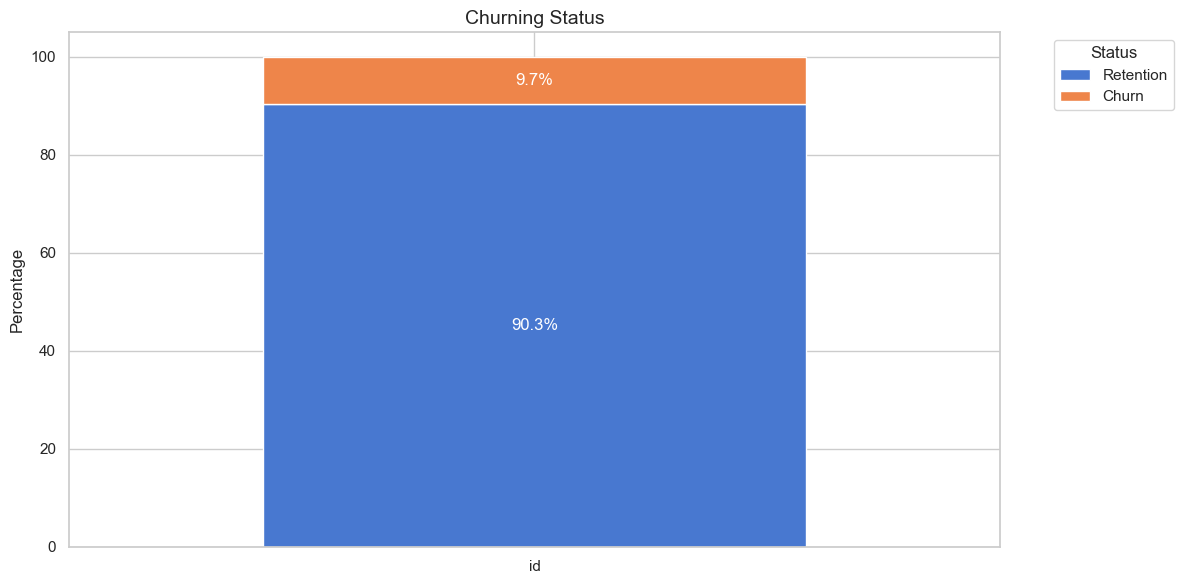

In [11]:
churn = client_df[['id', 'churn']]
churn_pivot = churn.groupby('churn')['id'].count().to_frame().T
churn_percentage = (churn_pivot.div(churn_pivot.sum(axis=1), axis=0) * 100)
plot_stacked_bars(churn_percentage, "Churning Status")

About 10% of customers churned, representing a significant business risk.

### Sales channel

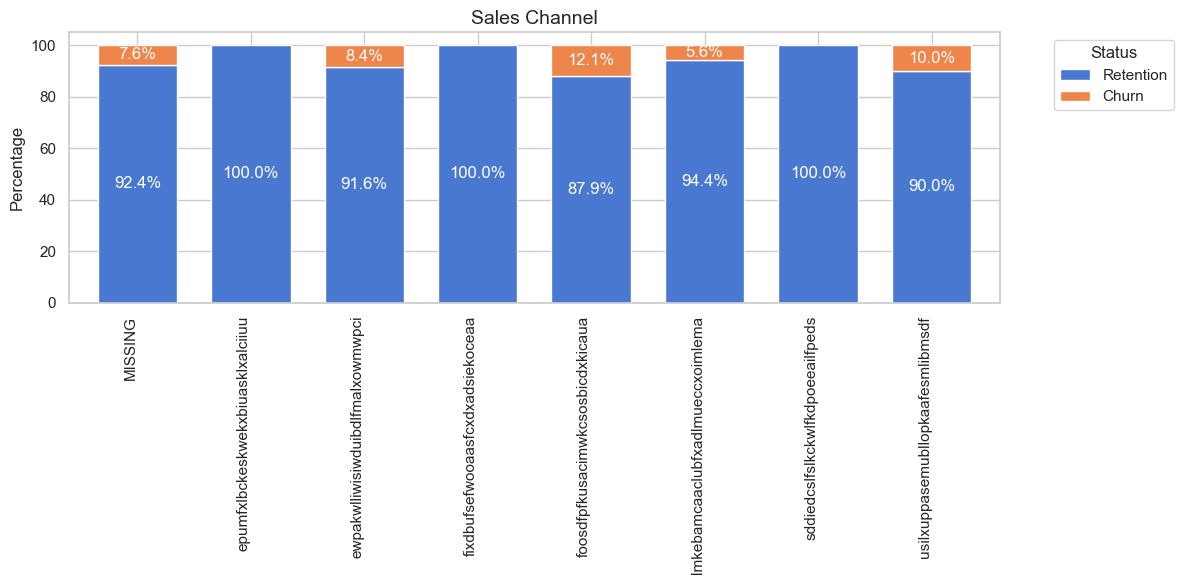

In [12]:
channel = client_df[['id', 'channel_sales', 'churn']]
channel_count = channel.groupby(['channel_sales','churn'])['id'].count().unstack().fillna(0)
channel_percent = (channel_count.div(channel_count.sum(axis=1), axis=0) * 100)
plot_stacked_bars(channel_percent, "Sales Channel", rot_=90)

- Churned customers are spread across multiple sales channels.
- Interestingly, the MISSING category shows a churn rate of 7.6%, indicating that missing data itself may carry predictive information.

### Consumption Pattern

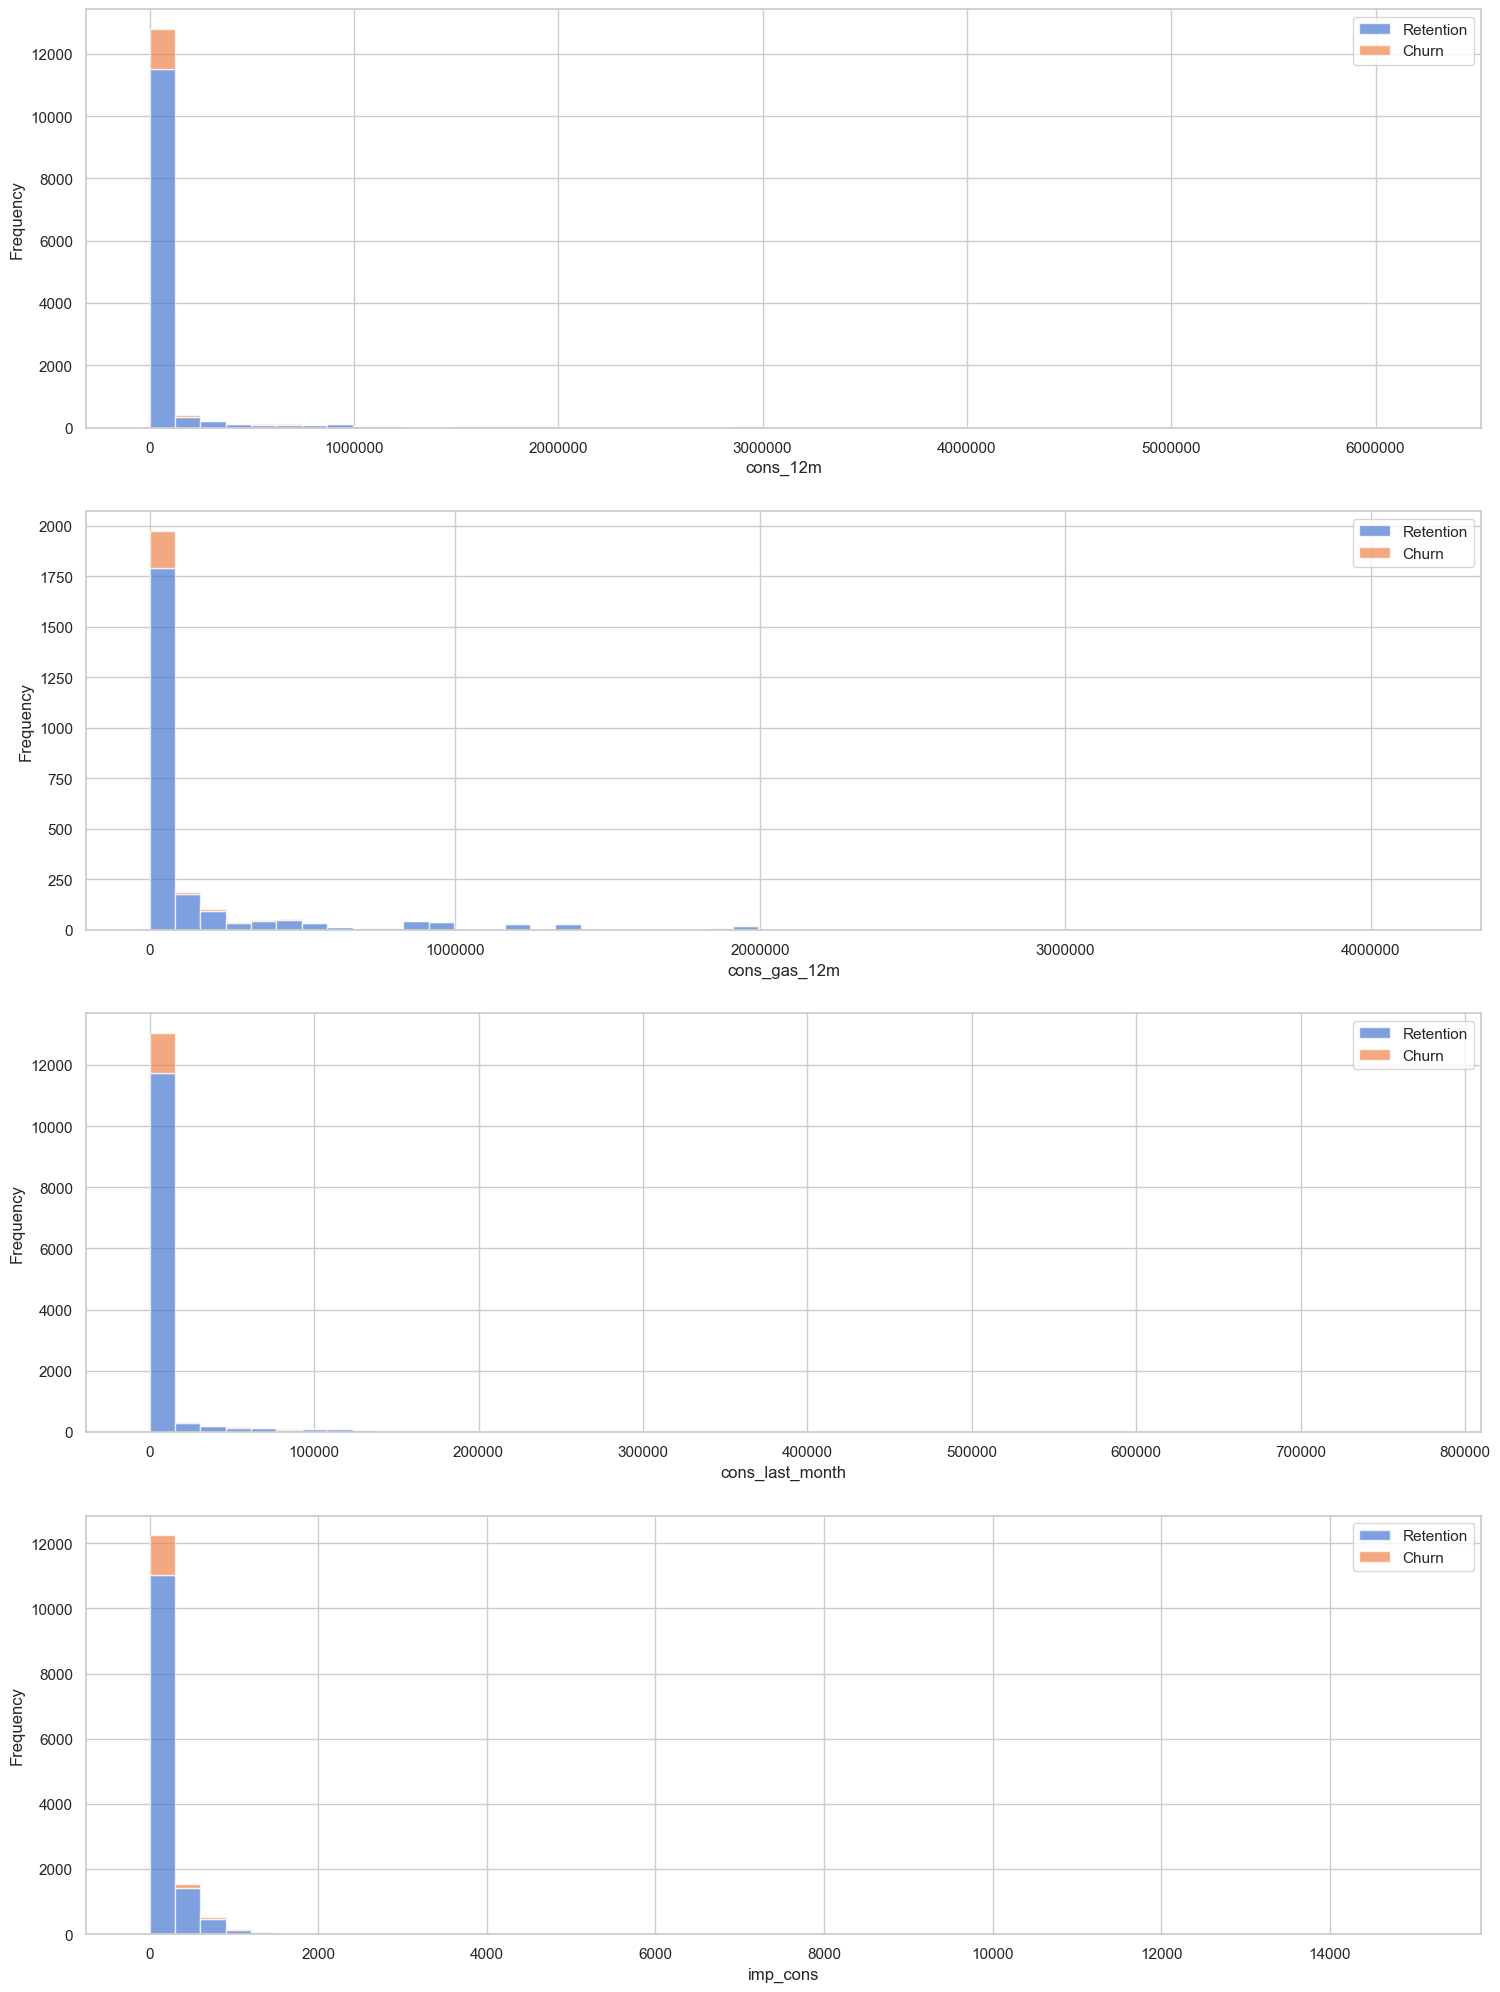

In [13]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=4, figsize=(18, 25))
plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])
plt.show()

Consumption data is positively skewed with long right tails, indicating potential outliers.

To explore these outliers more closely, we can use a boxplot, which provides a standardized summary of data distribution based on five key statistics:
- Minimum
- First quartile (Q1)
- Median
- Third quartile (Q3)
- Maximum


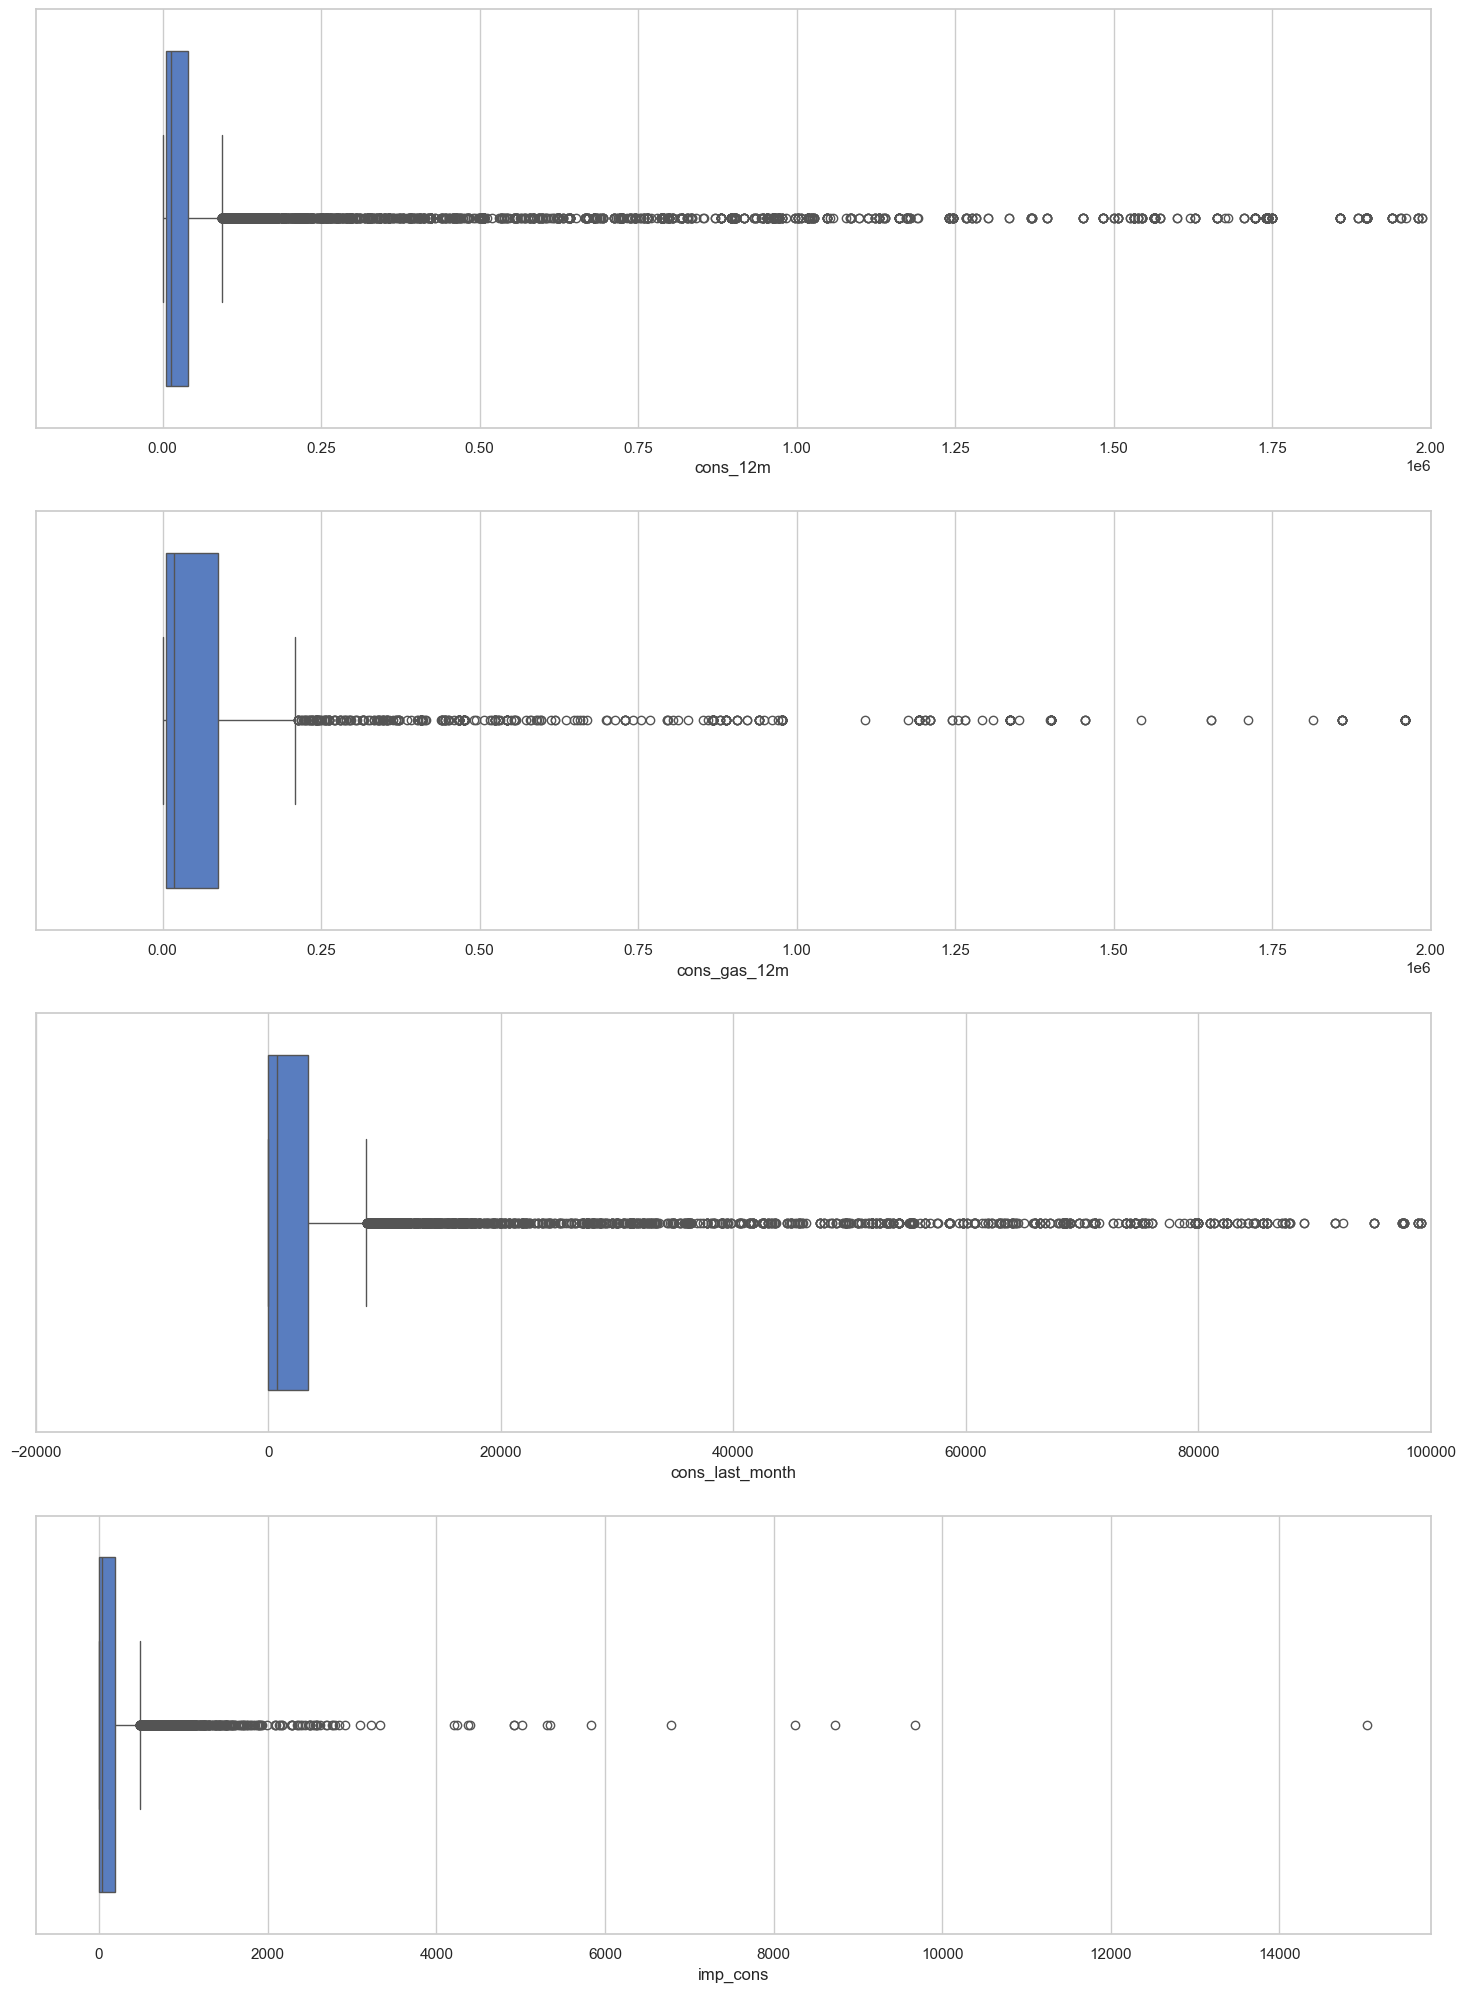

In [14]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

sns.boxplot(x=consumption["cons_12m"], ax=axs[0])
sns.boxplot(x=consumption[consumption["has_gas"] == "t"]["cons_gas_12m"], ax=axs[1])
sns.boxplot(x=consumption["cons_last_month"], ax=axs[2])
sns.boxplot(x=consumption["imp_cons"], ax=axs[3])

for ax in axs:
    ax.get_xaxis().get_major_formatter().set_useOffset(False)   # no offset
    ax.tick_params(axis='x', rotation=0)                       # keep clean

axs[0].set_xlim(-200000, 2000000)
axs[1].set_xlim(-200000, 2000000)
axs[2].set_xlim(-20000, 100000)
plt.show()

Boxplots further highlight these extremes, which we will address during feature engineering.

### Forecast Features

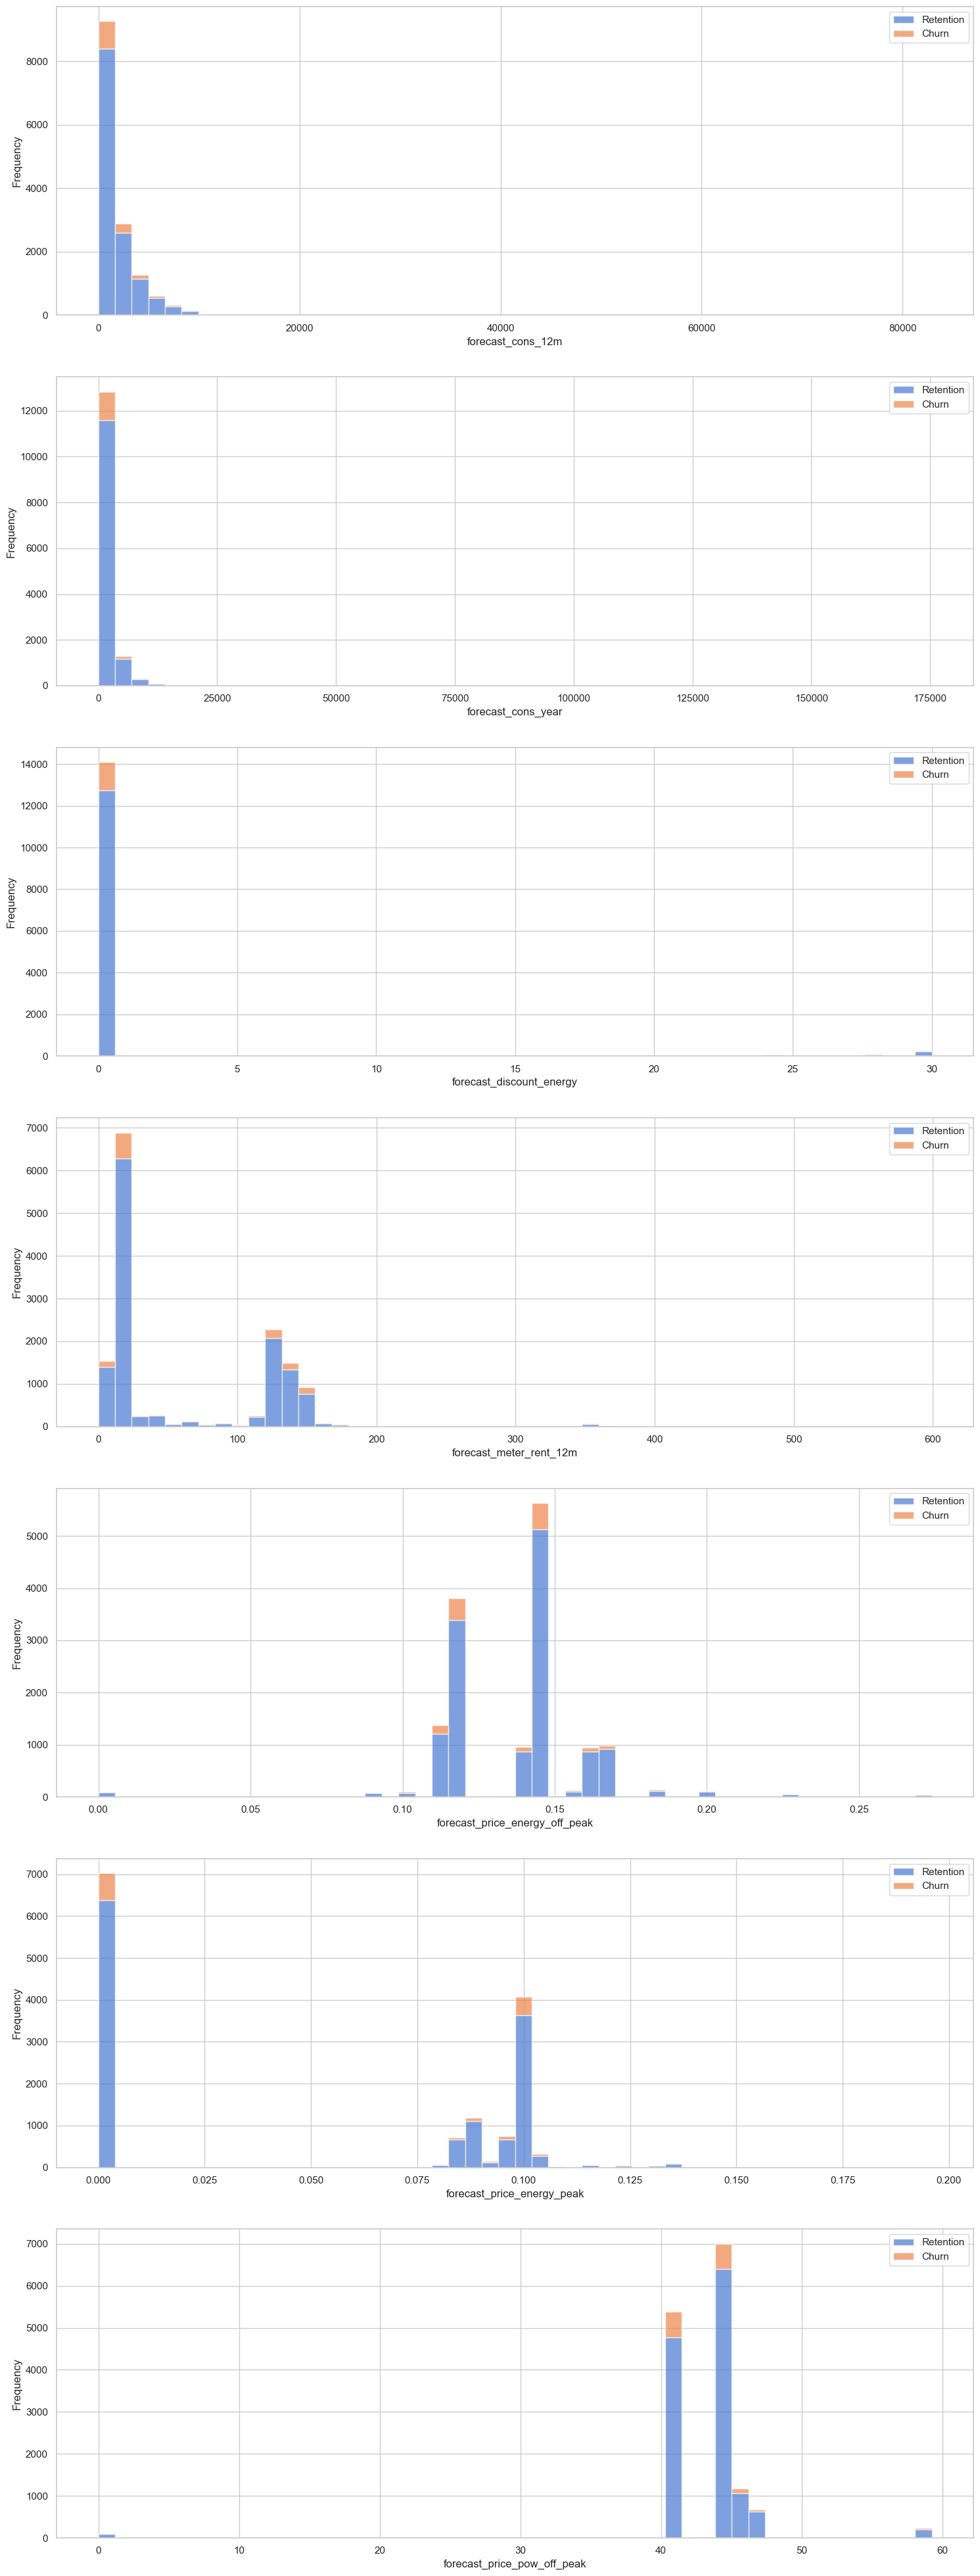

In [15]:
forecast_cols = ["forecast_cons_12m", "forecast_cons_year",
                 "forecast_discount_energy", "forecast_meter_rent_12m",
                 "forecast_price_energy_off_peak","forecast_price_energy_peak",
                 "forecast_price_pow_off_peak"]

fig, axs = plt.subplots(nrows=len(forecast_cols), figsize=(18,50))

for i, col in enumerate(forecast_cols):
    plot_distribution(client_df, col, axs[i])

plt.show()

- Most forecast variables are positively skewed.
- No clear visual difference in distributions between churned and retained customers, suggesting that these features may not strongly predict churn alone.

### Contract Type and Churn

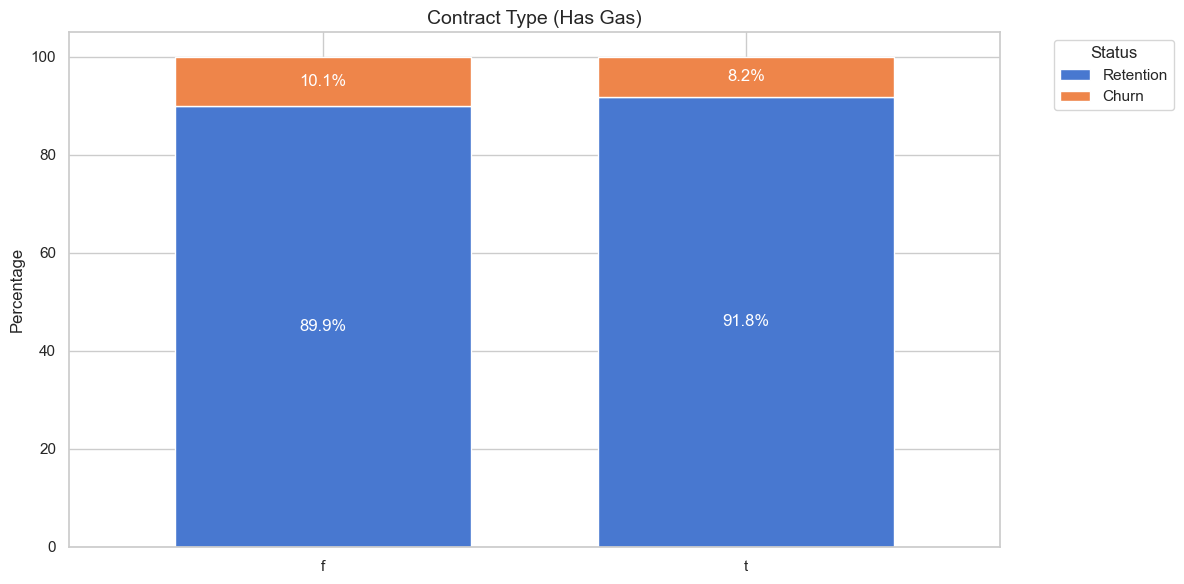

In [16]:
contract = client_df[['id', 'has_gas', 'churn']]
contract_count = contract.groupby(['has_gas','churn'])['id'].count().unstack().fillna(0)
contract_percent = (contract_count.div(contract_count.sum(axis=1), axis=0) * 100)
plot_stacked_bars(contract_percent, "Contract Type (Has Gas)")

Customers with a gas contract tend to have higher retention, indicating that bundled services increase loyalty.

### Margins

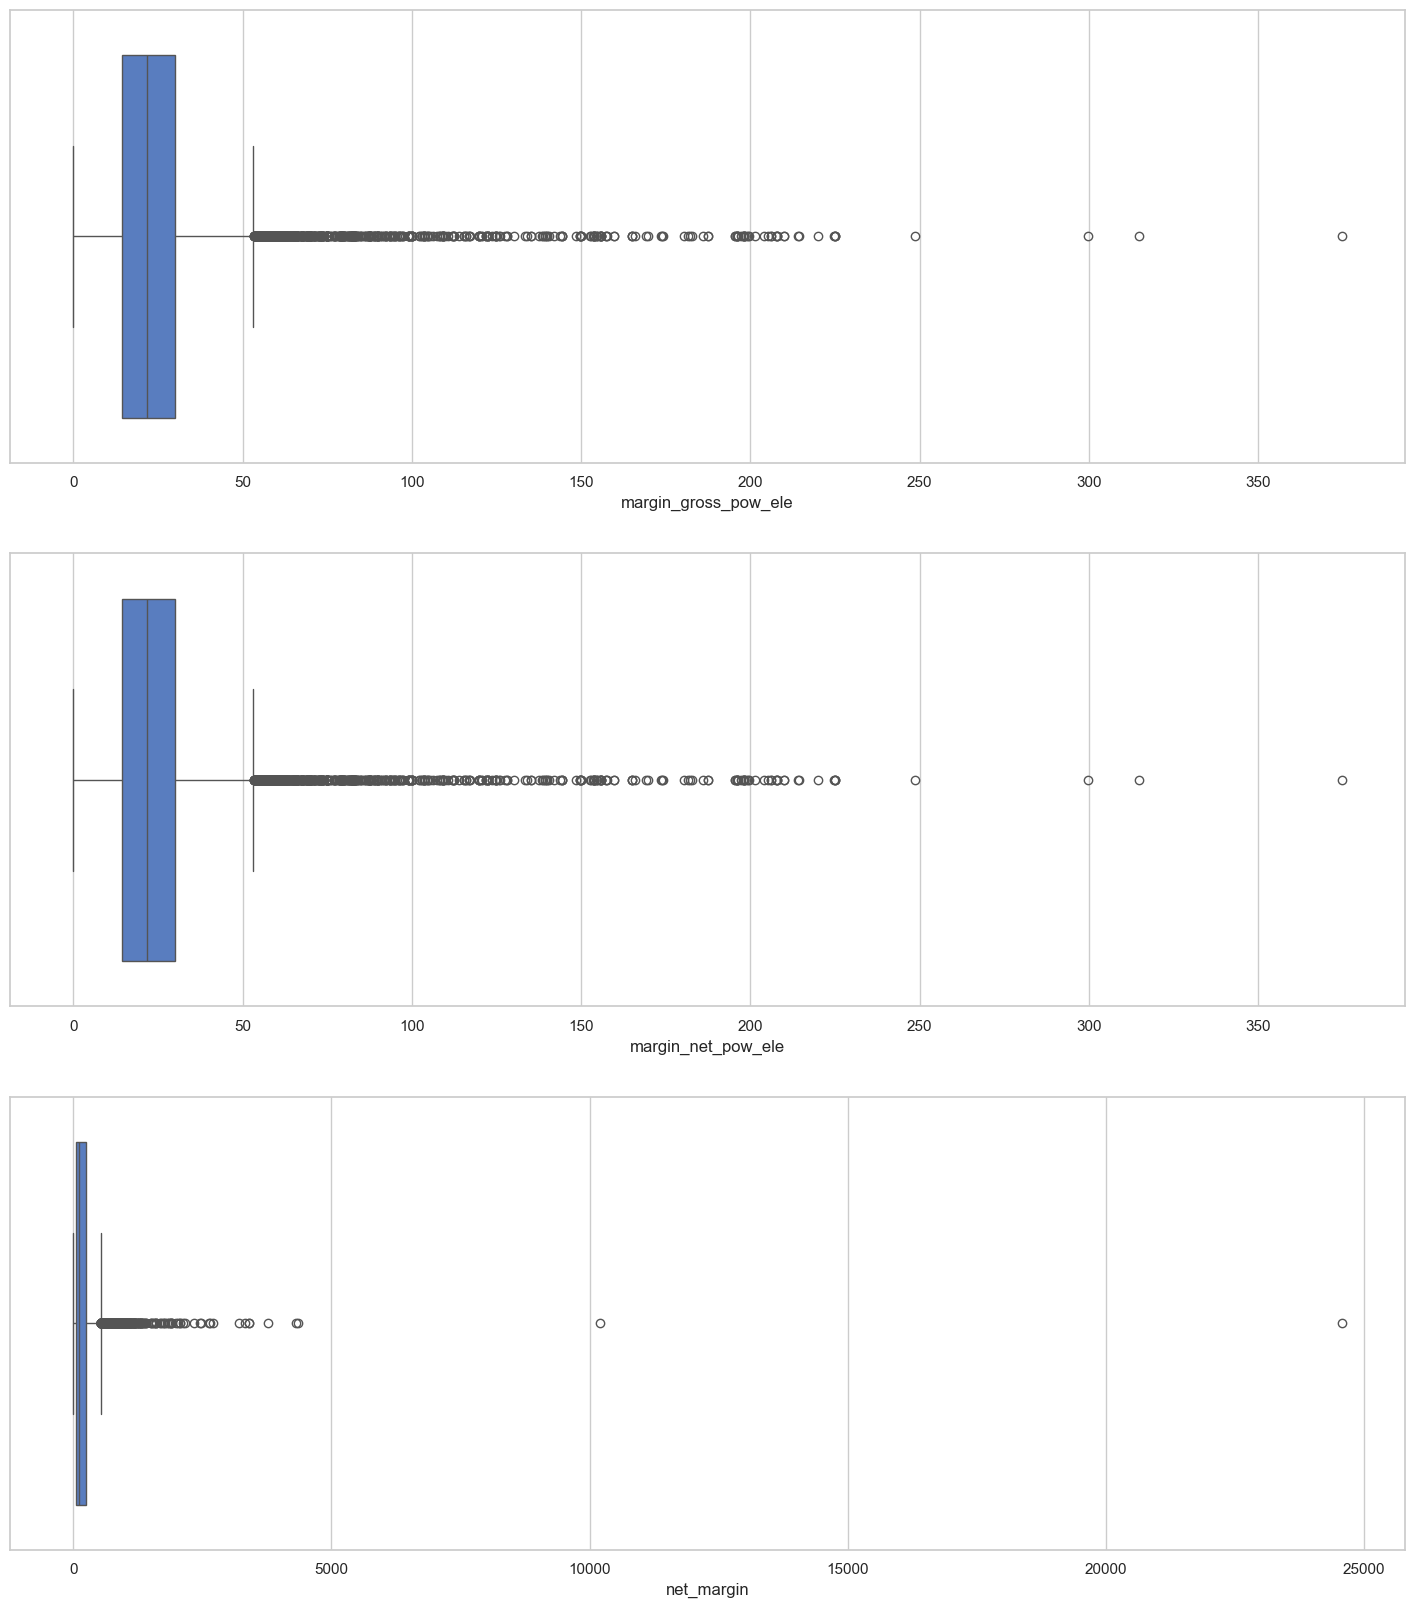

In [17]:
margin = client_df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]

fig, axs = plt.subplots(nrows=3, figsize=(18, 20))
sns.boxplot(x=margin["margin_gross_pow_ele"], ax=axs[0])
sns.boxplot(x=margin["margin_net_pow_ele"], ax=axs[1])
sns.boxplot(x=margin["net_margin"], ax=axs[2])

for ax in axs:
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=False))
    ax.ticklabel_format(style='plain', axis='x')

plt.show()

Margins are heavily right-skewed, with a small subset of customers contributing most profits.

### Power Consumption

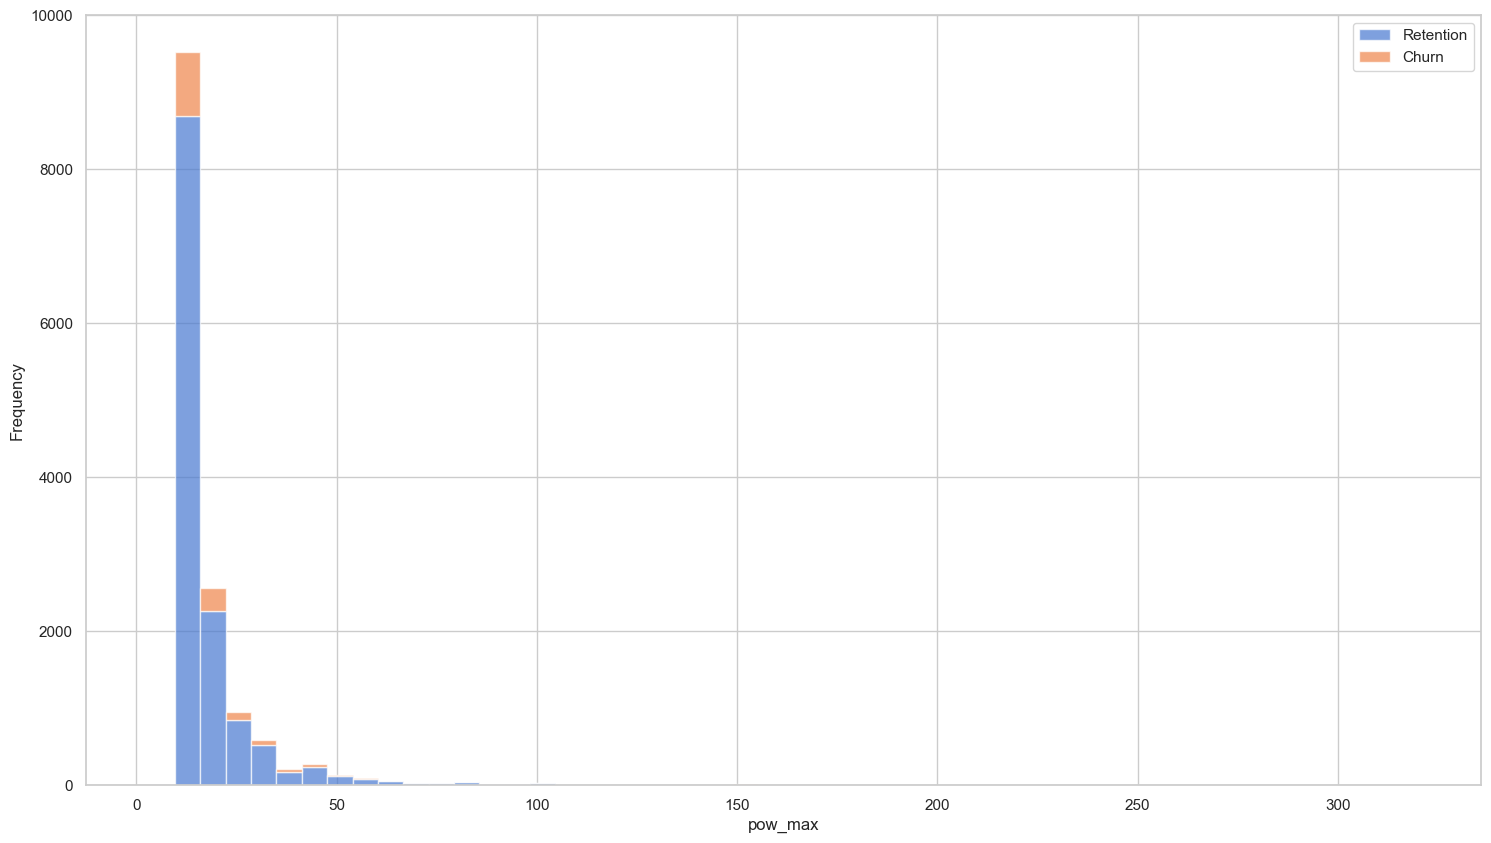

In [18]:
power = client_df[['id', 'pow_max', 'churn']]
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plot_distribution(power, 'pow_max', axs)
plt.show()

- Most customers consume low power, with a few outliers at high consumption levels.
- No major difference in patterns between churned and retained customers.

### Other Customer Features

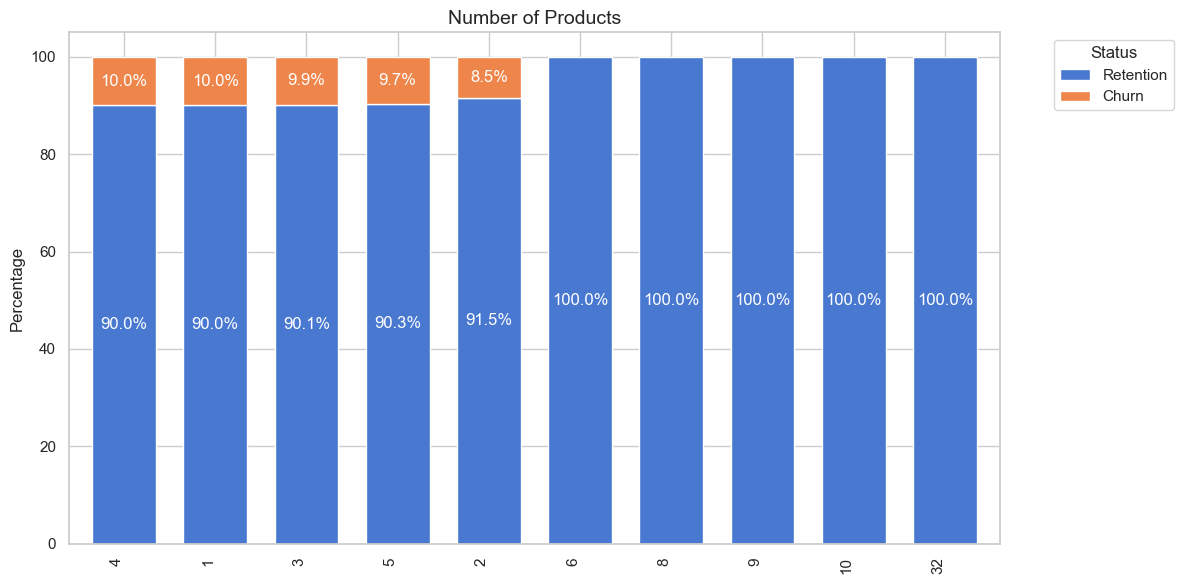

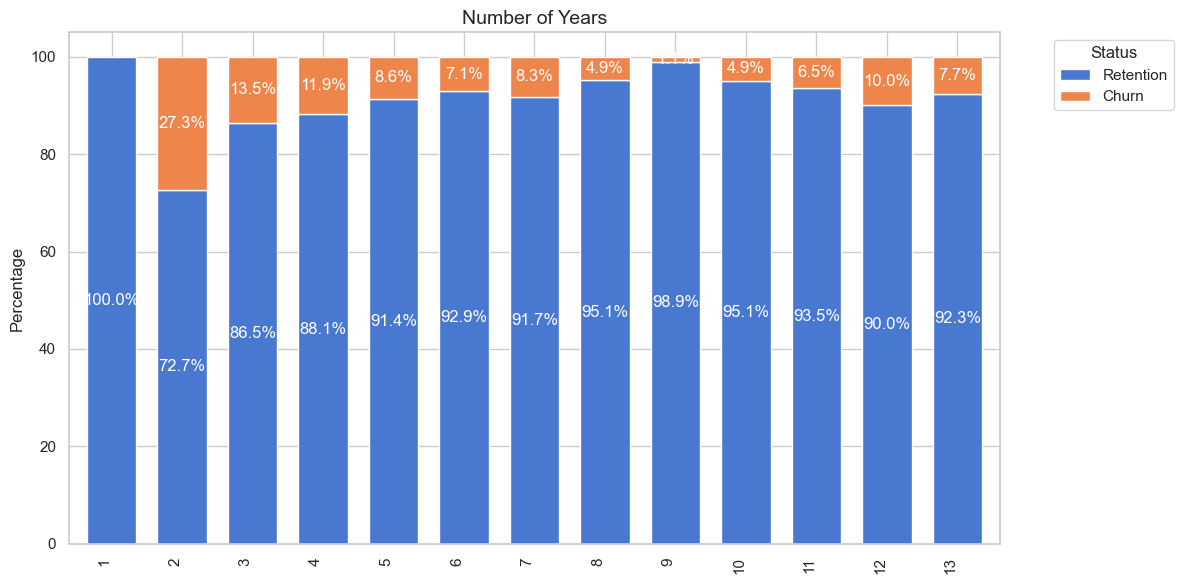

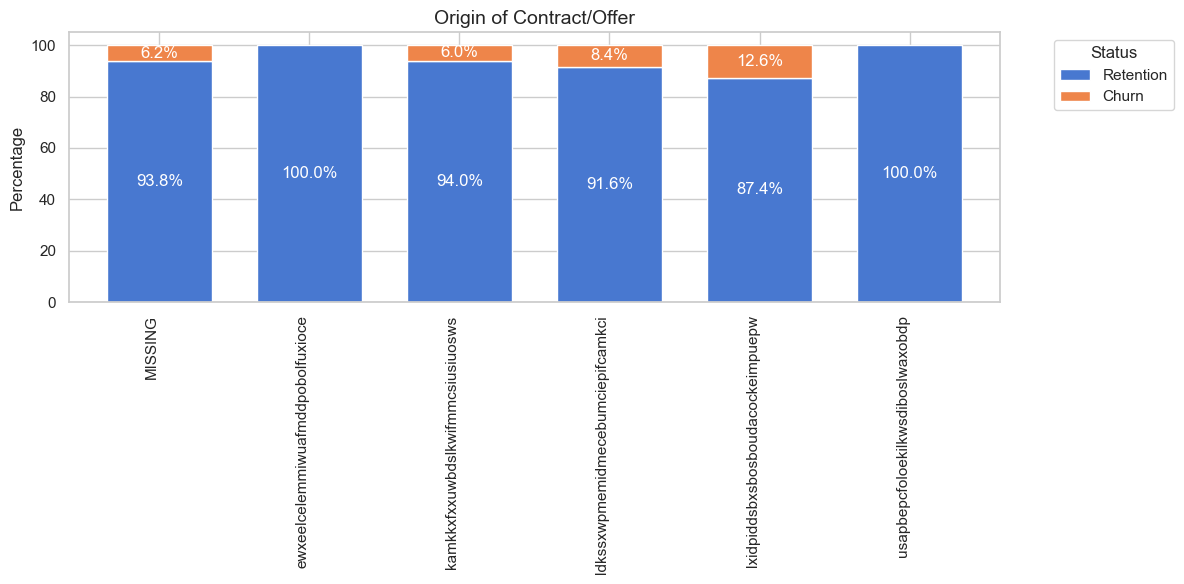

In [19]:
others = client_df[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]

# Number of products
products = others.groupby([others["nb_prod_act"], others["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)
plot_stacked_bars(products_percentage, "Number of Products")

# Customer tenure
years_antig = others.groupby([others["num_years_antig"], others["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0) * 100)
plot_stacked_bars(years_antig_percentage, "Number of Years")

# Contract origin
origin = others.groupby([others["origin_up"], others["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0) * 100)
plot_stacked_bars(origin_percentage, "Origin of Contract/Offer")

- Number of Products: Customers with more products are less likely to churn.
- Customer Tenure: Newer customers churn more, long-term customers stay.
- Contract Origin: Certain acquisition channels have higher churn, highlighting opportunities to improve targeting.

### Key Insights

- Churn is concentrated among a small portion of customers (~10%).
- Multi-product customers and long-term clients are more loyal.
- Bundled services like gas contracts increase retention.
- Certain sales channels and contract origins are associated with higher churn, which could guide marketing interventions.
- Forecast variables alone may not be strong predictors but could complement behavioral and demographic features.

This EDA provides a comprehensive view of customer behavior, setting the stage for feature engineering and predictive modeling.